### Deision Tree

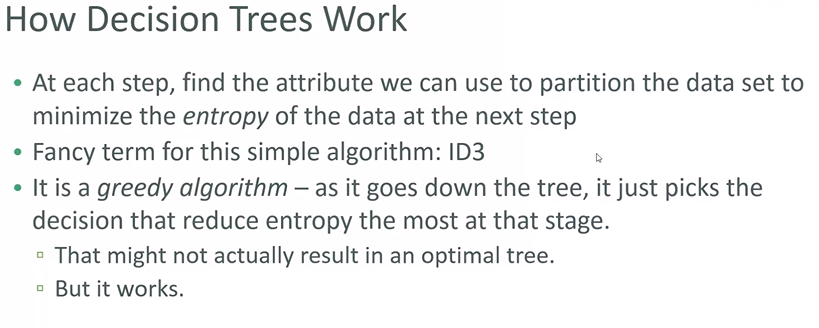

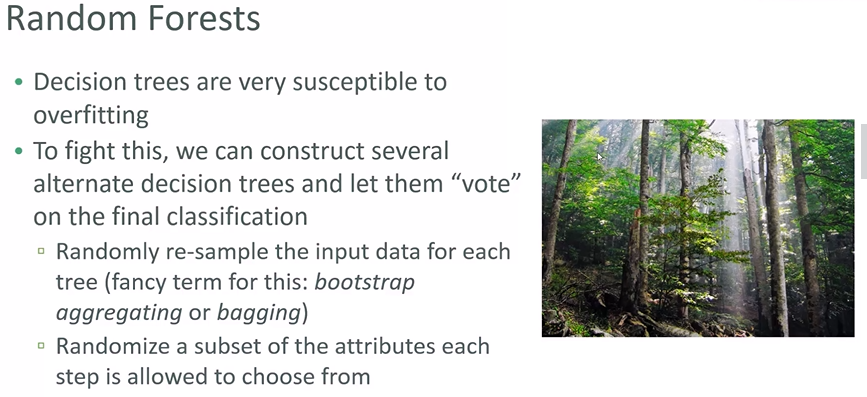

In [3]:
import numpy as no
import pandas as pd
from sklearn import tree

df = pd.read_csv("data/PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [4]:
d = {"Y":1, "N":0}
df["Hired"] = df["Hired"].map(d)
df["Hired"]

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    1
Name: Hired, dtype: int64

In [6]:
df["Employed?"] = df["Employed?"].map(d)
df["Top-tier school"] = df["Top-tier school"].map(d)
df["Interned"] = df["Interned"].map(d)

In [7]:
d = {"BS":0, "MS":1, "PhD":2}
df["Level of Education"] = df["Level of Education"].map(d)

In [8]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [9]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [10]:
y = df["Hired"]
X = df[features]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [34]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus as pydot

In [35]:
# !pip install pydotplus

In [49]:
# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

In [43]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X, y)

In [47]:
clf.predict(np.array([10, 1, 4, 0, 0, 0]).reshape(1, -1))

array([1], dtype=int64)

In [48]:
clf.predict(np.array([10, 0, 4, 0, 0, 0]).reshape(1, -1))

array([0], dtype=int64)

### Ensemble Learning

Random Forests was an example of ensemble learning.

It just means we use models to try and solve the same roblem, and let them vote on the results.

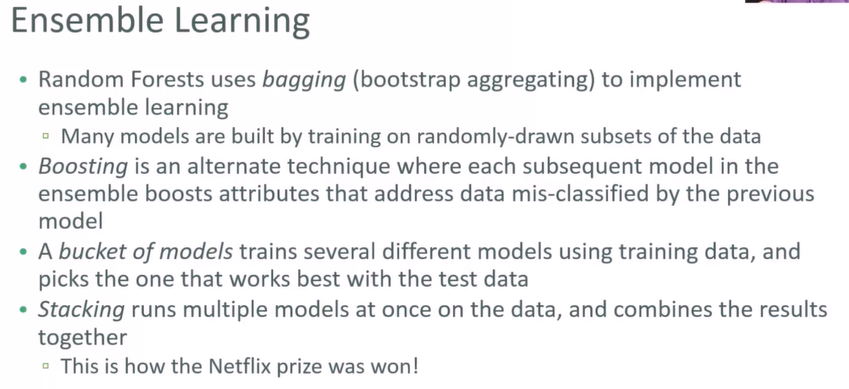

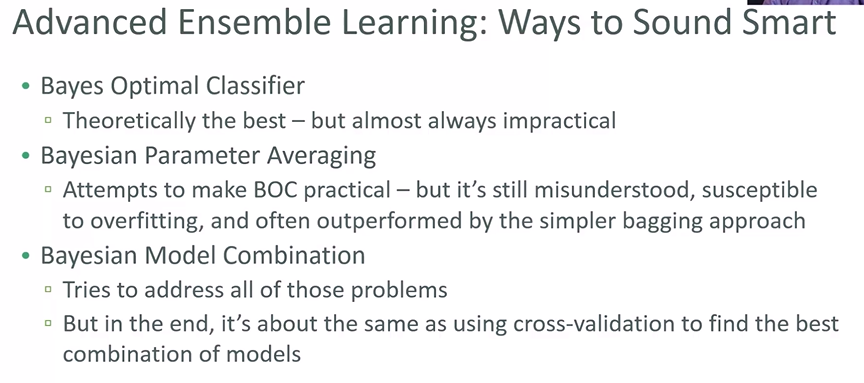

### CGBoost

eXtreme Gradient Boosted Trees

Remember, boosting is an ensemble method
    - each tree boosts attributes that let to misclassifications of previous tree

More facts:
    - routinely winds Kaggle competitions
    - easy to use and fast

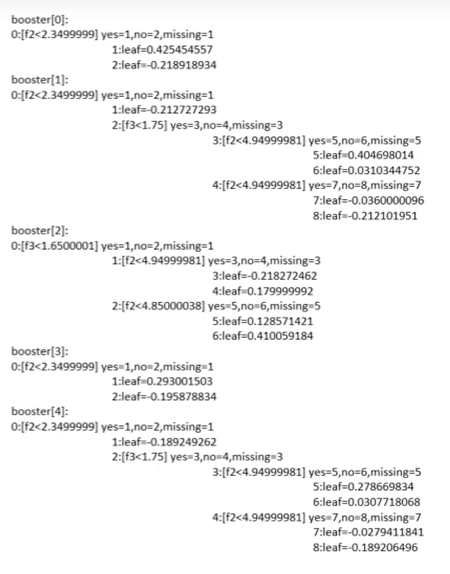

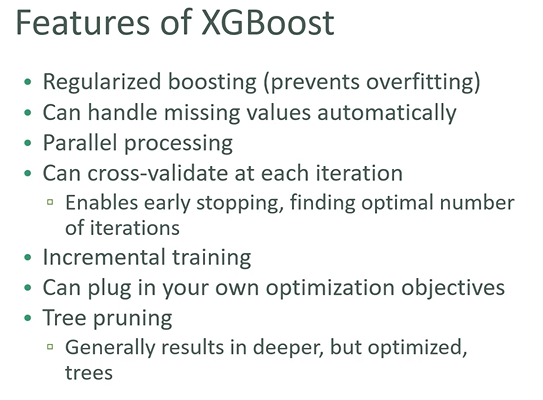

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()

numSamples, numFeatures = iris.data.shape

In [51]:
numSamples, numFeatures

(150, 4)

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=1)
# with random_state=0, the accuracy_score is equal 1.0

In [83]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)

In [84]:
param = {
    "max_depth":3,
    "eta":0.3,
    "objective":"multi:softmax",
    "num_class":3
}

epochs=10

In [85]:
model = xgb.train(param, train, epochs)

In [86]:
predictions = model.predict(test)
predictions

array([0., 1., 1., 0., 2., 1., 2., 0., 0., 2., 1., 0., 2., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 2., 0., 2., 1., 0., 0., 1., 2.], dtype=float32)

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)

0.9666666666666667

### Support Vector Machines

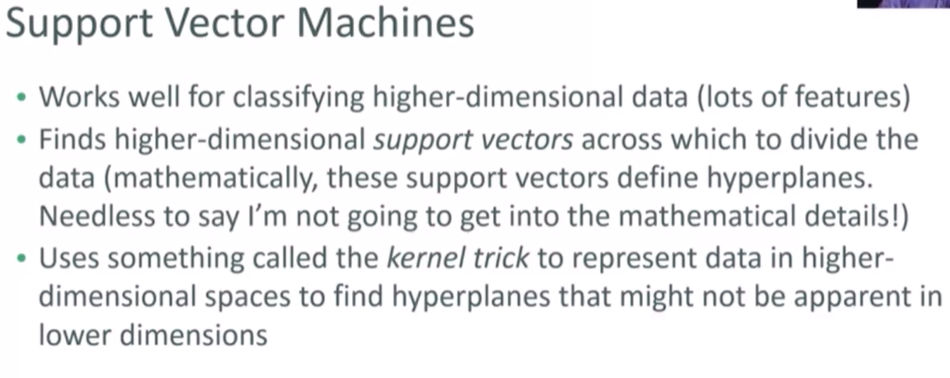

The important point is that SVM's employ some advanced mathematical trickery to cluster data, and it can handle datasets with lots of features.

It's also fairly expensive - the "kernel trick" is the only thing that makes it possible.

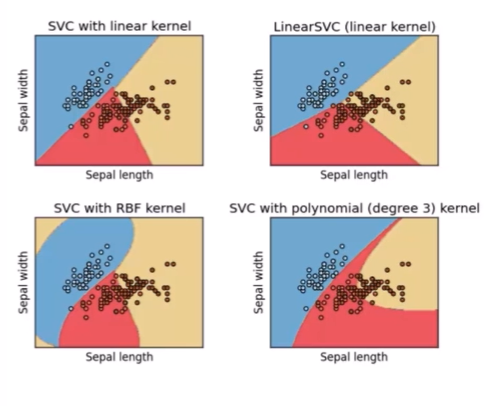

In [94]:
def createClusteredData(N, k):
    np.random.seed(2020)
    pointsPerCluster = float(N)/k
    X, y = [], []
    for i in range(k):
        incomeCentroid = np.random.uniform(2000., 200000.)
        ageCentroid = np.random.uniform(20.0, 70.)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.), 
                      np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [95]:
from pylab import *
from sklearn.preprocessing import MinMaxScaler

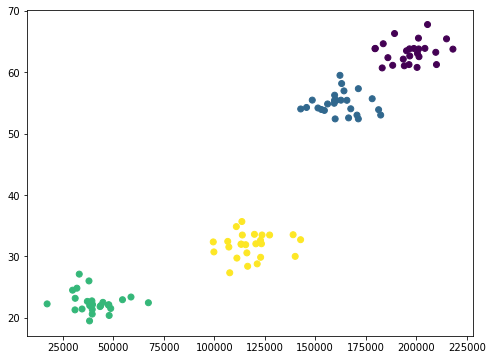

In [100]:
(X, y) = createClusteredData(100, 4)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float))
plt.show()

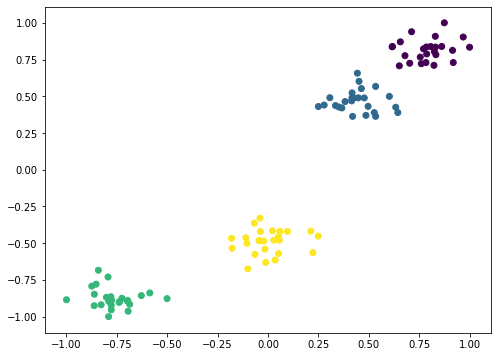

In [101]:
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float))
plt.show()

In [103]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel="linear", C=C).fit(X, y)

In [110]:
def plotPredictions(clf):
    # create a dense grid of points to sample
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                        np.arange(-1, 1, .001))
    # convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # convert to aa list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generte predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)
    
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) # reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # draw the contour
    plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float))
    plt.show()

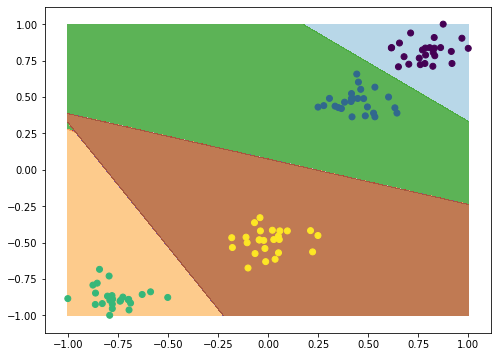

In [111]:
plotPredictions(svc)

In [112]:
svc.predict(scaling.transform([[20000, 40]]))

array([2])

In [113]:
svc.predict(scaling.transform([[5000, 65]]))

array([1])